In [4]:
import scipy
import os
import matplotlib.pyplot as plt


In [40]:
def tmscore(target, modified):
    tmscore = -1
    os.system(f"./../tmscore/TMscore {target} {modified} >> tmscore_temp_output")
    with open("tmscore_temp_output") as f:
        for line in f:
            if line.startswith("TM-score"):
                tmscore = float(line.split('=')[1].strip().split(' ')[0])
    os.system("rm tmscore_temp_output")
    return tmscore

def plot_tmruns(dict,protien,mode,rep,color,marker,label=''):
    first_iter = False
    for run_pdb in dict:
        if dict[run_pdb]['protien'] == protien and dict[run_pdb]['mode'] == mode and dict[run_pdb]['rep'] == rep:
            plt.scatter(dict[run_pdb]['value'],dict[run_pdb]['tmscore'],color=color,marker=marker,label=label if first_iter else '')
            first_iter = False
def tmscore_dict_mult_conf(directory,target_pdbs):
    dict = {}
    for run_pdb in os.listdir(directory):
        if run_pdb[-1] == "b":
            parsed_name = run_pdb.split('_')
            dict[run_pdb] = {}
            dict[run_pdb]['protien'] = parsed_name[0]
            dict[run_pdb]['mode'] = parsed_name[1]
            dict[run_pdb]['value'] = float(parsed_name[2])
            dict[run_pdb]['rep'] = parsed_name[3]
            dict[run_pdb]['tmscore'] = {}
            for target_pdb in target_pdbs:
                dict[run_pdb]['tmscore'][target_pdb.split('_')[0]] = tmscore(directory + target_pdb, directory + run_pdb)
    return dict

def plot_tmruns_mult_conf(dict,run_protien,target_protiens):
    '''
    This plots all the protiens and their many tmscores in the dictionary. Since the dict is made from the output file, all pdbs in 
    the output file will be here. different runs need to be separated. 
    Assume: mode = noise. representation = z.
    '''
    colors = ['blue','red','green','black']
    markers = ['>','+','<','*']
    for i,_ in enumerate(target_protiens): # *protien* is the target protien the tmscore is against.
        first_label = True
        label = 'against: ' + target_protiens[i]
        for run_pdb in dict:
            if dict[run_pdb]['protien'] == run_protien:
                plt.scatter(dict[run_pdb]['value'],dict[run_pdb]['tmscore'][target_protiens[i]],color=colors[i],marker=markers[i], label=label if first_label else '')
                first_label = False
    plt.legend()
    plt.title(run_protien + ' sequence used with noise applied to pair rep')
    plt.xlabel('noising value')
    plt.ylabel('tmscore')

def bulk_plot_doe(d,m,t):
    plt.scatter(0,0, marker=".", color = 'blue', label='(s) single rep')
    plt.scatter(0,0, marker=".", color = 'red', label='(z) pair rep')
    #plt.scatter(0,0, marker=".", color = 'green', label='(m) msa rep')
    plt.scatter(0,0, marker=".", color = 'black', label='(sz) single and pair rep')
    #plt.scatter(0,0, marker=".", color = 'orange', label='(sm)')
    #plt.scatter(0,0, marker=".", color = 'brown', label='(zm)')
    for p,marker in zip(['7MZZ','5D3W','4O75','1DGN'],['>','*','+','<']):
        print(marker,p)
        plot_tmruns(d,p,m,'s','blue',marker, label='(s) single rep')
        #plot_tmruns(d,p,m,'m','green',marker)
        plot_tmruns(d,p,m,'z','red',marker, label='(z) pair rep')
        plot_tmruns(d,p,m,'sz','black',marker, label='(sz) single and pair rep') # This label does nothing. Works better if use above scatter method.
        #plot_tmruns(d,p,m,'sm','orange',marker)
        #plot_tmruns(d,p,m,'zm','brown',marker)
    plt.legend()
    plt.xscale('log')
    plt.xlabel('value')
    plt.ylabel('tmscore')
    plt.title(t)
    plt.show()

def tmscore_dict(directory,target_pdbs):
    dict = {}
    for run_pdb in os.listdir(directory):
        if run_pdb[-1] == "b":
            target_pdb = ''
            for possible_target_pdb in target_pdbs:
                if run_pdb[0:3] == possible_target_pdb[0:3]:
                    target_pdb = possible_target_pdb
            parsed_name = run_pdb.split('_')
            dict[run_pdb] = {}
            dict[run_pdb]['protien'] = parsed_name[0]
            dict[run_pdb]['mode'] = parsed_name[1]
            dict[run_pdb]['value'] = float(parsed_name[2])
            dict[run_pdb]['rep'] = parsed_name[3]
            dict[run_pdb]['tmscore'] = tmscore(directory + target_pdb, directory + run_pdb)
    return dict


In [45]:
d_mult_conf_xyle = tmscore_dict_mult_conf('../data/old_data/output-xyle/',['4JA3_none_1.0_s_prediction.pdb', '4JA4_none_1.0_s_prediction.pdb', '6N3I_none_1.0_s_prediction.pdb'])
# note: d_mult_conf_xyle has issues? I don't know what I was thinking during that run.
d = tmscore_dict('../data/old_data/output-BIGDOE/',['7MZZ_none_1.0_s_prediction.pdb','5D3W_none_1.0_s_prediction.pdb','4O75_none_1.0_s_prediction.pdb','1DGN_none_1.0_s_prediction.pdb'])
d_1ake_4ake_run = tmscore_dict_mult_conf('../data/old_data/output-1ake/',['1AKExray_downloaded_0_z_xrayscattering.pdb', '4AKExray_downloaded_0_z_xrayscattering.pdb','1AKE_none_1.0_s_prediction.pdb'])
d_2dri = tmscore_dict_mult_conf('../data/old_data/output-2dri/',['2drixray_downloaded_0_z_xrayscattering.pdb', '1ba2xray_downloaded_0_z_xrayscattering.pdb','1urpxray_downloaded_0_z_xrayscattering.pdb','2DRI_none_0.0_z_prediction.pdb'])
d_4ja4 = tmscore_dict_mult_conf('../data/old_data/output-xyle-only-4ja4/',['4ja3xray_downloaded_0_z_xrayscattering.pdb', '4ja4xray_downloaded_0_z_xrayscattering.pdb', '6n3ixray_downloaded_0_z_xrayscattering.pdb'])
d_6n3i = tmscore_dict_mult_conf('../data/old_data/output-xyle-only-6n3i/',['4ja3xray_downloaded_0_z_xrayscattering.pdb', '4ja4xray_downloaded_0_z_xrayscattering.pdb', '6n3ixray_downloaded_0_z_xrayscattering.pdb'])

> 7MZZ
* 5D3W
+ 4O75
< 1DGN


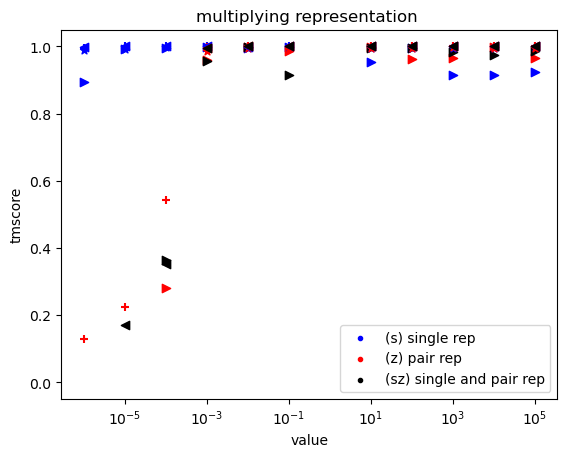

> 7MZZ
* 5D3W
+ 4O75
< 1DGN


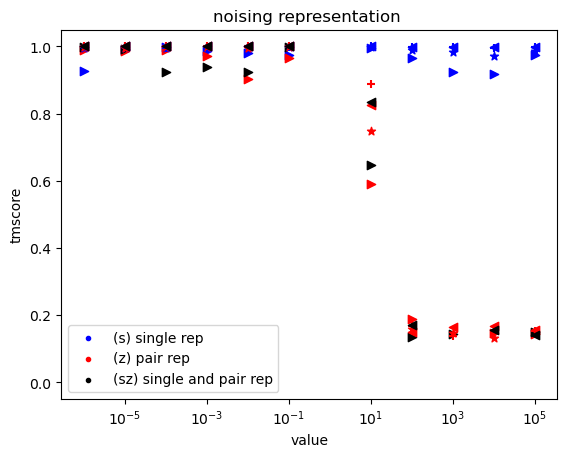

> 7MZZ
* 5D3W
+ 4O75
< 1DGN


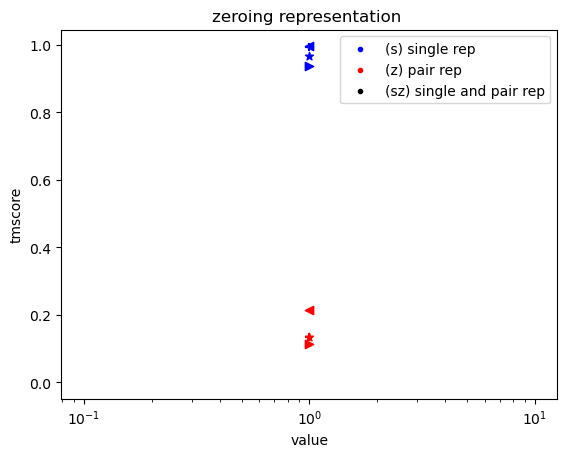

In [41]:
bulk_plot_doe(d,'mult','multiplying representation ')
bulk_plot_doe(d,'noise','noising representation ')
bulk_plot_doe(d,'zero','zeroing representation ')

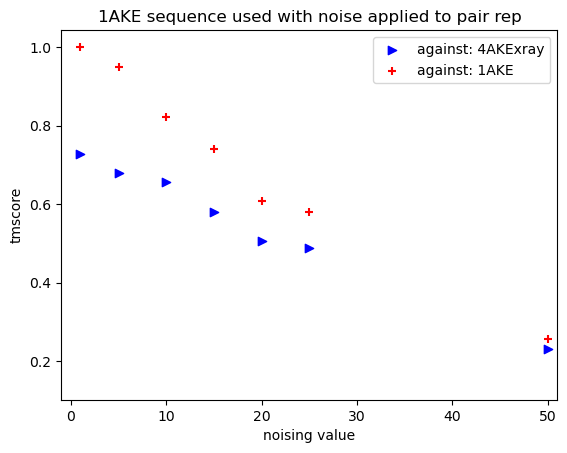

In [46]:
#plot_tmruns_mult_conf(d_1ake_4ake_run,'1AKE',['1AKExray','4AKExray','1AKE'])
plot_tmruns_mult_conf(d_1ake_4ake_run,'1AKE',['4AKExray','1AKE'])#remove 1ake xray
plt.xlim(-1,51)
plt.show()


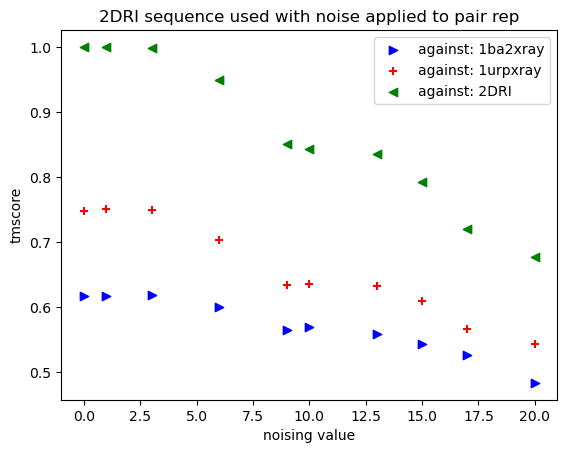

In [53]:
#plot_tmruns_mult_conf(d_2dri,'2DRI',['2drixray','1ba2xray','1urpxray','2DRI'])
plot_tmruns_mult_conf(d_2dri,'2DRI',['1ba2xray','1urpxray','2DRI'])#simplify
#plt.xlim(-1,51)
plt.show()
###
#
# Can i even use this if they aren't really different conformations?
#

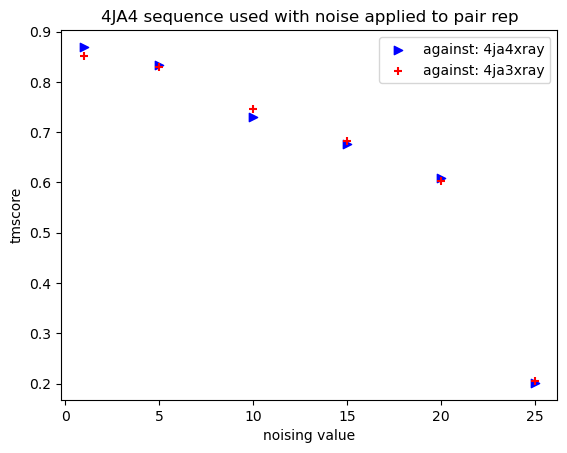

In [58]:
plot_tmruns_mult_conf(d_4ja4,'4JA4',['4ja4xray','4ja3xray'])
plt.show()

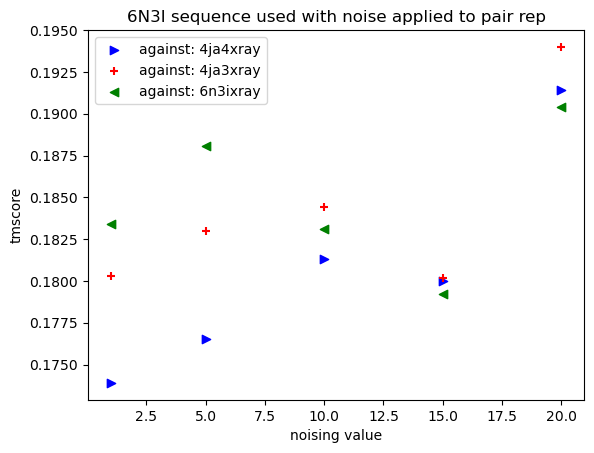

In [56]:
#plot_tmruns_mult_conf(d_6n3i,'6N3I',['4ja4xray','4ja3xray','6n3ixray']) # this does poorly in a missleading way?
#plt.show()
#
#
# Was it 6n3i or 6n3L that I was supposed to be using? check with the paper. 
#
# either way this isn't truely a new conformation. Just a similar shaped protein(diff seq tho) so lets ignore it.
#

In [57]:
#
# THIS is wrong. I don't know what my vision was here but I don't understand what I was doing. How did I even get 4ja3 runs if the seq is the same as 4ja4. Something is wrong. 
#

#plot_tmruns_mult_conf(d_mult_conf_xyle,'4JA4',['4JA4','4JA3','6N3I']) # something wrong. TMscore (4ja3,4ja4) = 0.9. Why are they the same?
#plt.show()
#plot_tmruns_mult_conf(d_mult_conf_xyle,'4JA3',['4JA4','4JA3','6N3I'])
#plt.show()
#plot_tmruns_mult_conf(d_mult_conf_xyle,'6N3I',['4JA4','4JA3','6N3I'])
#plt.show()

In [ ]:
#print(tmscore(a,b))
#plot_pdb(a)
#plot_pdb(b)
t2 = 'output/4JA3_none_1.0_s_prediction.pdb'
a10 = 'output/4JA4_noise_10.0_z_prediction.pdb'
t1 = 'output/4JA4_none_1.0_s_prediction.pdb'
t3 = 'output/6N3I_none_1.0_s_prediction.pdb'
a15 = 'output/4JA4_noise_15.0_z_prediction.pdb'
a5 = 'output/4JA4_noise_5.0_z_prediction.pdb'

print('4ja4 4ja3',tmscore(t1,t2))
print('4ja4 6n3i',tmscore(t1,t3))

print('4ja4 4ja4*noise(5)',tmscore(t1,a5))
print('4ja4 4ja4*noise(10)',tmscore(t1,a10))
print('4ja4 4ja4*noise(15)',tmscore(t1,a15))

print('4ja3 4ja4*noise(5)',tmscore(t2,a5))
print('4ja3 4ja4*noise(10)',tmscore(t2,a10))
print('4ja3 4ja4*noise(15)',tmscore(t2,a15))

print('6n3i 4ja4*noise(5)',tmscore(t3,a5))
print('6n3i 4ja4*noise(10)',tmscore(t3,a10))
print('6n3i 4ja4*noise(15)',tmscore(t3,a15))

